In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def star_plot(x: str, y: str, hue: str, data: pd.DataFrame) -> None:
    df = data[[x, y, hue]]

    categories = list(df[x].unique())
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    hues = df[hue].unique()
    for h in hues:
        values_df = df[df[hue] == h]
        means_df = values_df.groupby([x, hue]).agg("mean").reset_index()
        
        # Create a dictionary to map each category to its mean value
        category_to_value = {row[x]: row[y] for _, row in means_df.iterrows()}
        
        # Create the values list in the correct order of categories
        values = [category_to_value.get(category, 0) for category in categories]
        values += values[:1]
        
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, linewidth=2, label=h)
        ax.legend()

    # Customize the chart
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

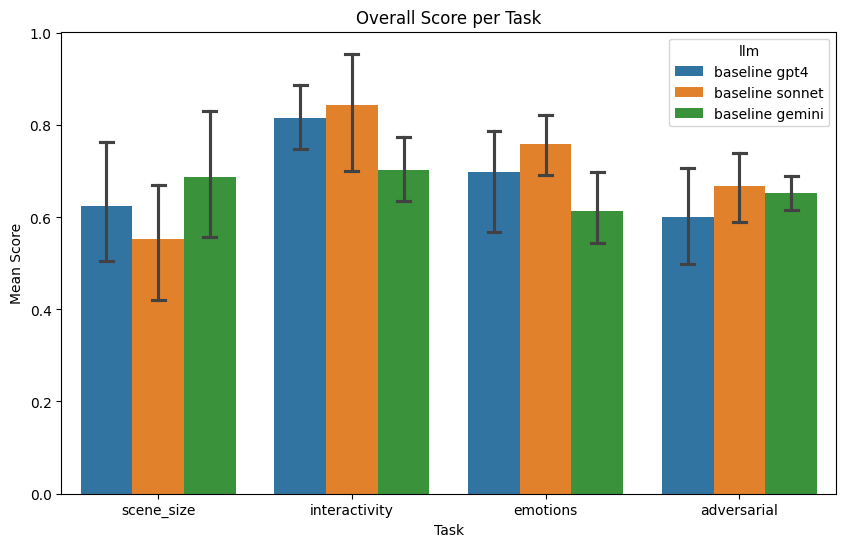

In [28]:
# Assuming results_df is already defined
metric_score_df = None
for run_type in ["benchmark", "baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}.csv")
            results_df["llm"] = f"{run_type} {llm_id}"

            impersonation_cols = [col for col in results_df.columns if col.startswith("impersonation_")]
            synergy_cols = [col for col in results_df.columns if col.startswith("synergy_")]
            # Calculate the mean of impersonation columns, ignoring NaNs
            results_df["average_impersonation"] = results_df[impersonation_cols].mean(axis=1, skipna=True)
            results_df["average_synergy"] = results_df[synergy_cols].mean(axis=1, skipna=True)
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="synergy_impersonation_score", hue="llm", data=metric_score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Mean Score")
plt.show()


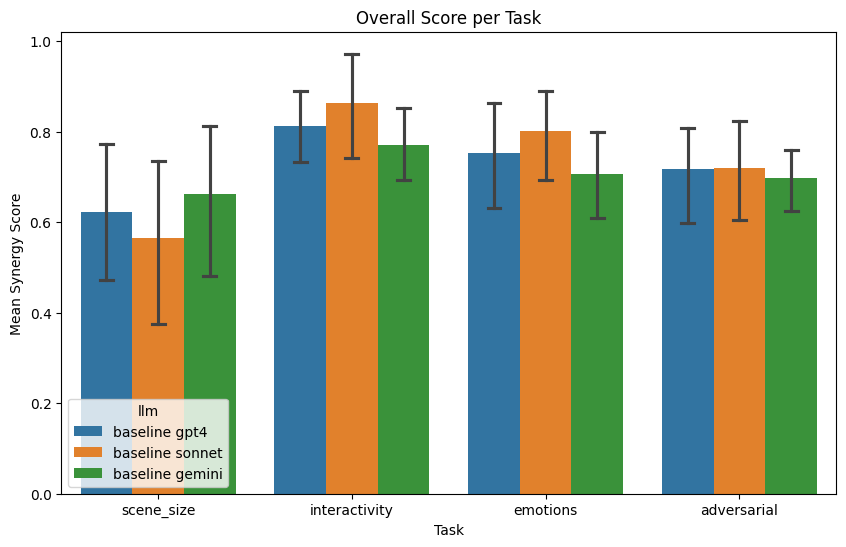

In [29]:
# Assuming results_df is already defined
metric_score_df = None
for run_type in ["benchmark", "baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}.csv")
            results_df["llm"] = f"{run_type} {llm_id}"

            impersonation_cols = [col for col in results_df.columns if col.startswith("impersonation_")]
            synergy_cols = [col for col in results_df.columns if col.startswith("synergy_")]
            # Calculate the mean of impersonation columns, ignoring NaNs
            results_df["average_impersonation"] = results_df[impersonation_cols].mean(axis=1, skipna=True)
            results_df["average_synergy"] = results_df[synergy_cols].mean(axis=1, skipna=True)
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="average_synergy", hue="llm", data=metric_score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Mean Synergy Score")
plt.show()


Text(0.5, 1.0, 'Overall Score per Task')

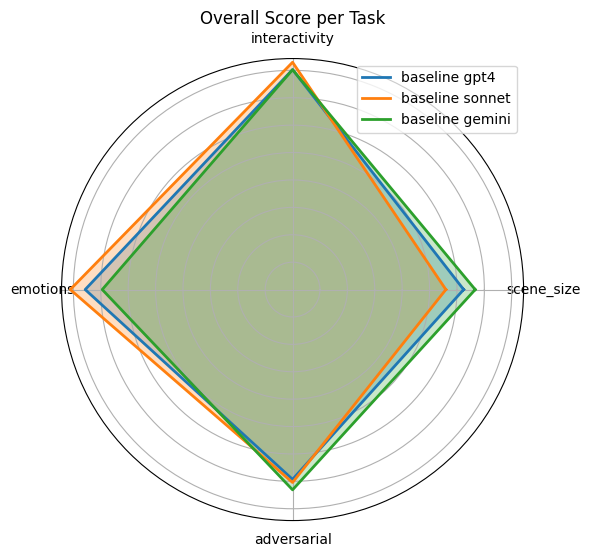

In [30]:
star_plot(x="task", y="score", hue="llm", data=metric_score_df)
plt.title("Overall Score per Task")

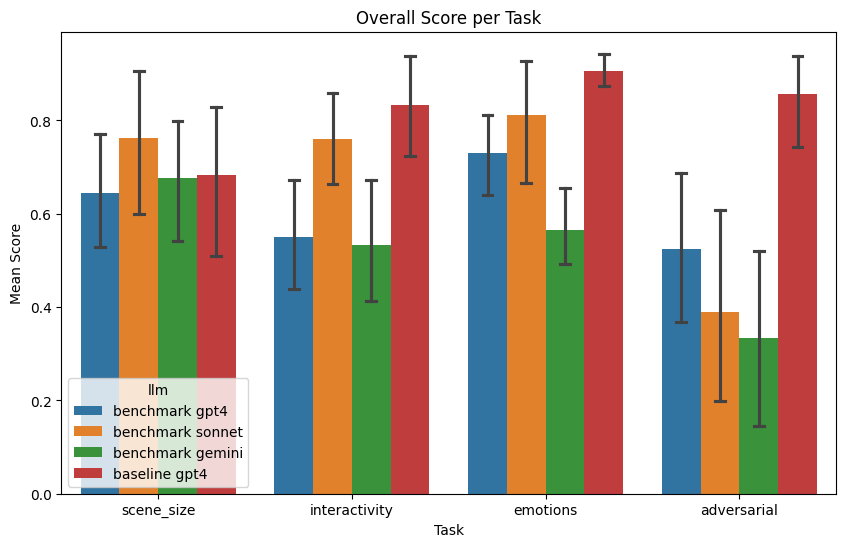

In [53]:
# Assuming results_df is already defined
metric_score_df = None
for run_type in ["benchmark", "baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}_eval_by_gpt4.csv")
            results_df["llm"] = f"{run_type} {llm_id}"
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])
results_df = pd.read_csv(f"results/baseline_results_gpt4.csv")
results_df["llm"] = f"baseline gpt4"
metric_score_df = pd.concat([metric_score_df, results_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="score", hue="llm", data=metric_score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Mean Score")
plt.show()


Text(0.5, 1.0, 'Overall Score per Task')

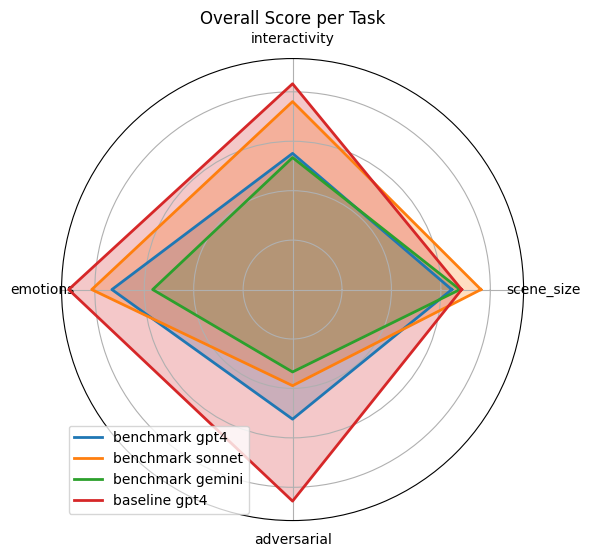

In [54]:
star_plot(x="task", y="score", hue="llm", data=metric_score_df)
plt.title("Overall Score per Task")

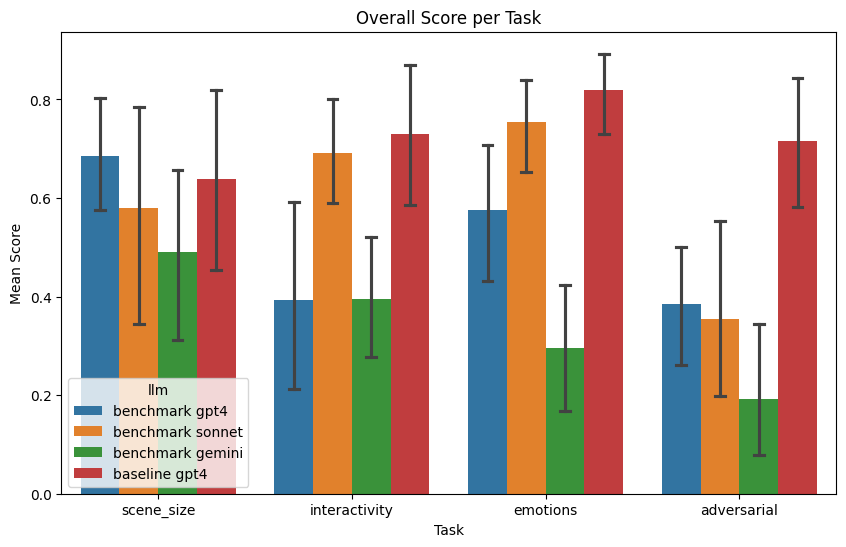

In [55]:
# Assuming results_df is already defined
metric_score_df = None
for run_type in ["benchmark", "baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}_eval_by_gemini.csv")
            results_df["llm"] = f"{run_type} {llm_id}"
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])
results_df = pd.read_csv(f"results/baseline_results_gemini.csv")
results_df["llm"] = f"baseline gpt4"
metric_score_df = pd.concat([metric_score_df, results_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="score", hue="llm", data=metric_score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Mean Score")
plt.show()


Text(0.5, 1.0, 'Overall Score per Task')

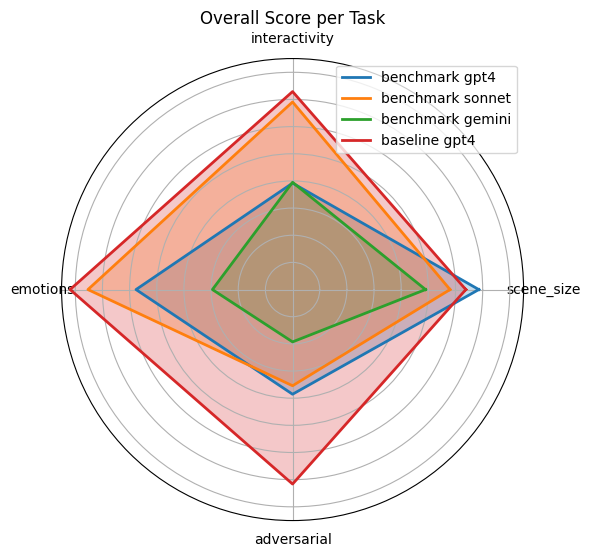

In [56]:
star_plot(x="task", y="score", hue="llm", data=metric_score_df)
plt.title("Overall Score per Task")

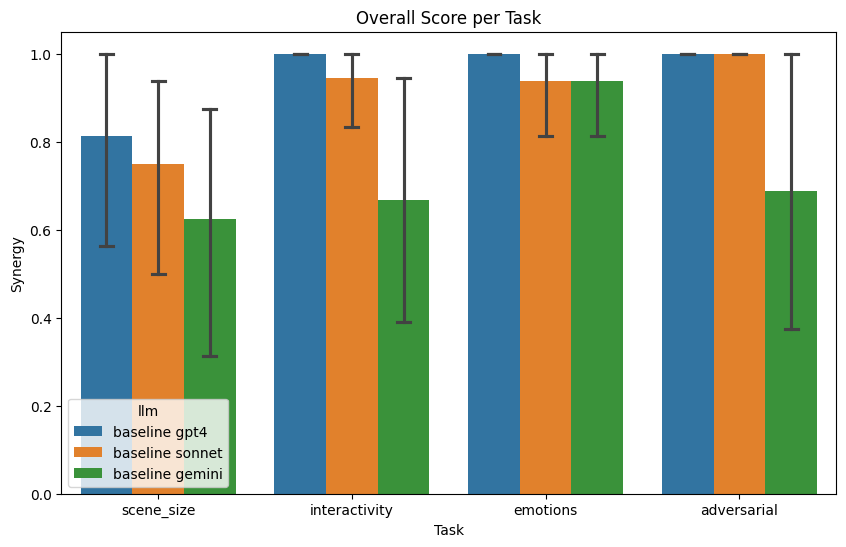

In [57]:
# Assuming results_df is already defined
metric_score_df = None
for run_type in ["baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}.csv")
            results_df["llm"] = f"{run_type} {llm_id}"
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="synergy", hue="llm", data=metric_score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Synergy")
plt.show()


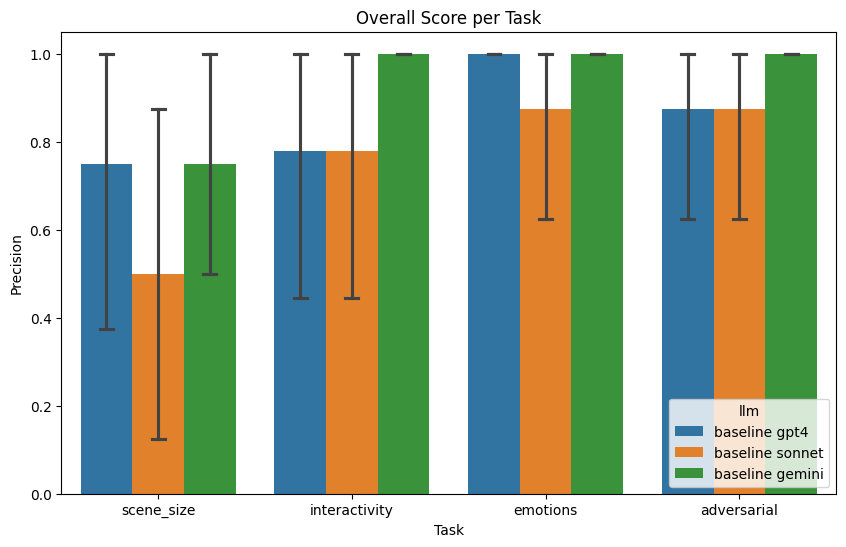

In [58]:
# Assuming results_df is already defined
metric_score_df = None
for run_type in ["baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}.csv")
            results_df["llm"] = f"{run_type} {llm_id}"
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="precision", hue="llm", data=metric_score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Precision")
plt.show()


    task_idx         task     score  exec_seconds  precision  synergy  \
0          0   scene_size  0.833333     36.333563        1.0      1.0   
1          1   scene_size  0.166667     22.696968        0.0      0.0   
2          2   scene_size  0.833333     38.043470        1.0      1.0   
3          3   scene_size  0.611111     32.810779        1.0      0.5   
4          4   scene_size  0.805556     43.751856        1.0      1.0   
..       ...          ...       ...           ...        ...      ...   
28        28  adversarial  0.833333    132.693091        1.0      1.0   
29        29  adversarial  0.833333    105.669527        1.0      1.0   
30        30  adversarial  0.541667    100.776206        1.0      0.0   
31        31  adversarial  0.777778    138.333233        1.0      1.0   
32        32  adversarial  0.472222     70.617384        1.0      0.0   

    impersonation_ARNOLD  impersonation_HAMMOND  impersonation_NEDRY  \
0                    0.5                    0.5    

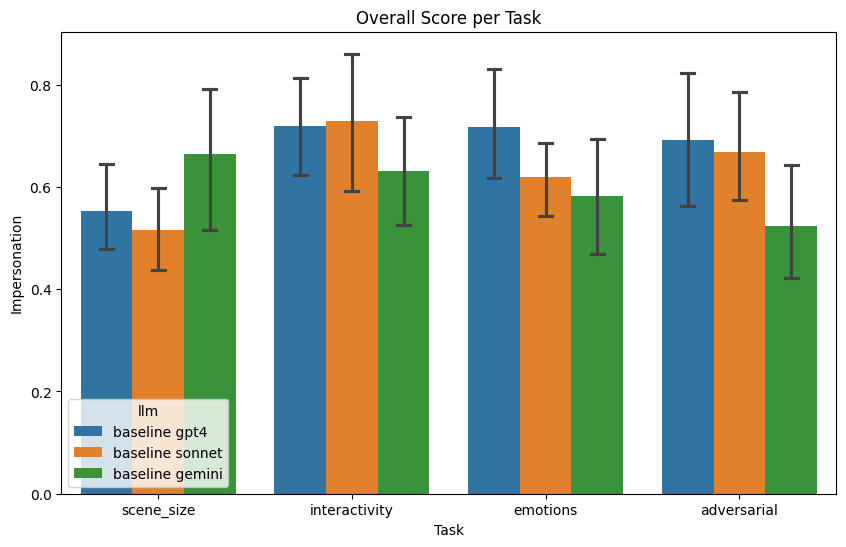

In [59]:
# Assuming results_df is already defined
metric_score_df = None
for run_type in ["baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}.csv")
            results_df["llm"] = f"{run_type} {llm_id}"

            # Identify impersonation columns
            impersonation_cols = [col for col in results_df.columns if col.startswith("impersonation_")]
            
            # Calculate the mean of impersonation columns, ignoring NaNs
            results_df["average_impersonation"] = results_df[impersonation_cols].mean(axis=1, skipna=True)
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])
print(metric_score_df)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="average_impersonation", hue="llm", data=metric_score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Impersonation")
plt.show()


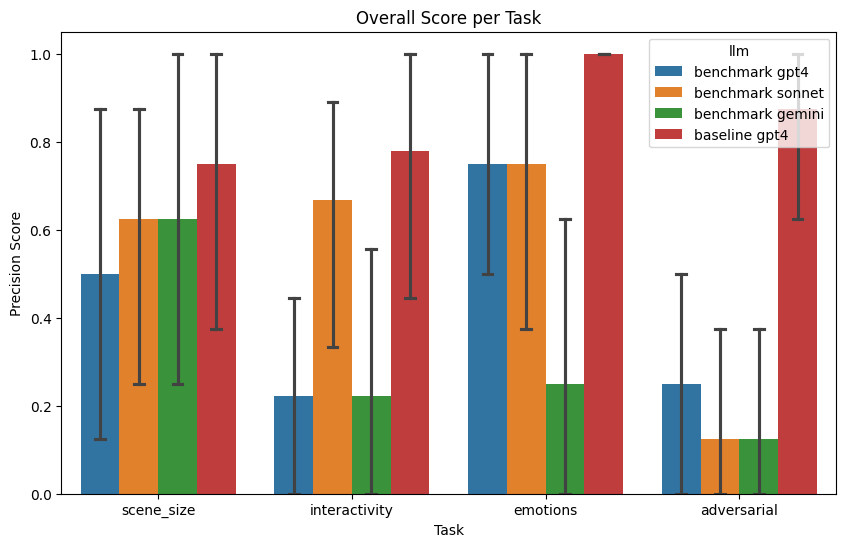

In [60]:
# Assuming results_df is already defined
metric_score_df = None
for run_type in ["benchmark", "baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}_eval_by_gpt4.csv")
            results_df["llm"] = f"{run_type} {llm_id}"

             # Identify impersonation columns
            impersonation_cols = [col for col in results_df.columns if col.startswith("impersonation_")]
            
            # Calculate the mean of impersonation columns, ignoring NaNs
            results_df["average_impersonation"] = results_df[impersonation_cols].mean(axis=1, skipna=True)
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])
results_df = pd.read_csv(f"results/baseline_results_gpt4.csv")
results_df["llm"] = f"baseline gpt4"
metric_score_df = pd.concat([metric_score_df, results_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="precision", hue="llm", data=metric_score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Precision Score")
plt.show()


In [61]:
import os
import sys
import re

# Allow loading dialogue middleware packages
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)


from benchmark import dataset_utils
import pandas as pd
from tqdm import tqdm

In [62]:
df = pd.read_csv("movie_reviews.csv")
titles_per_genre = df[["genre", "title"]].groupby(["genre", "title"])
critic_scores_for_title = df[["title", "genre", "score"]].groupby(["title", "genre"]).agg('mean').reset_index()


In [63]:
metric_score_df = None
for run_type in [ "baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}.csv")
            results_df["llm"] = f"{run_type} {llm_id}"
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])
print(len(metric_score_df))
metric_score_df.reset_index(drop=True, inplace=True)
print(len(metric_score_df))
print(metric_score_df.info()) 
# print the score column
print(metric_score_df["llm"])


99
99
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   task_idx                        99 non-null     int64  
 1   task                            99 non-null     object 
 2   score                           99 non-null     float64
 3   exec_seconds                    99 non-null     float64
 4   precision                       99 non-null     float64
 5   synergy                         99 non-null     float64
 6   impersonation_ARNOLD            3 non-null      float64
 7   impersonation_HAMMOND           3 non-null      float64
 8   impersonation_NEDRY             3 non-null      float64
 9   impersonation_Narrator          96 non-null     float64
 10  impersonation_ARON              3 non-null      float64
 11  impersonation_ERIC              3 non-null      float64
 12  impersonation_LAO               

In [64]:
dataset_df = pd.read_csv(f"dataset/task_dataset.csv")


In [65]:
import pandas as pd
from scipy.stats import pearsonr
# Load dataset_df to get title and genre columns
dataset_df = pd.read_csv("dataset/task_dataset.csv")

df = pd.read_csv("movie_reviews.csv")
critic_scores_for_title = df[["title", "genre", "score"]].groupby(["title", "genre"]).agg('mean').reset_index()


metric_score_df = None
for run_type in ["baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}.csv")
            results_df["llm"] = f"{run_type} {llm_id}"

            # Add title and genre columns from dataset_df
            results_df["title"] = dataset_df["title"]
            results_df["genre"] = dataset_df["genre"]
        except FileNotFoundError:
            continue

        if metric_score_df is None:
            metric_score_df = results_df
        else:
            metric_score_df = pd.concat([metric_score_df, results_df])



# Merge dataframes on title and genre
merged_df = pd.merge(critic_scores_for_title, metric_score_df, on=['title', 'genre'], suffixes=('_critic', '_metric'))


# Step 2: Extract the scores
critic_scores = merged_df['score_critic']
metric_scores = merged_df['score_metric']

# Step 3: Perform Pearson correlation
pearson_corr, p_value = pearsonr(critic_scores, metric_scores)

# Step 4: Output the results
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson correlation coefficient: 0.11961008863969991
P-value: 0.2534612243377095
The correlation is not statistically significant.


In [66]:
from scipy.stats import spearmanr, kendalltau

# Assuming you already have the merged DataFrame from the previous step
# If not, merge them again as shown in the previous example

# Step 1: Spearman's Rank Correlation
spearman_corr, spearman_p_value = spearmanr(critic_scores, metric_scores)
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman P-value: {spearman_p_value}")

if spearman_p_value < 0.05:
    print("The Spearman correlation is statistically significant.")
else:
    print("The Spearman correlation is not statistically significant.")

# Step 2: Kendall's Tau Correlation
kendall_corr, kendall_p_value = kendalltau(critic_scores, metric_scores)
print(f"Kendall's Tau correlation coefficient: {kendall_corr}")
print(f"Kendall's Tau P-value: {kendall_p_value}")

if kendall_p_value < 0.05:
    print("The Kendall's Tau correlation is statistically significant.")
else:
    print("The Kendall's Tau correlation is not statistically significant.")

Spearman correlation coefficient: 0.22044194759610838
Spearman P-value: 0.0337280600515412
The Spearman correlation is statistically significant.
Kendall's Tau correlation coefficient: 0.14728831442102416
Kendall's Tau P-value: 0.04498152866374417
The Kendall's Tau correlation is statistically significant.


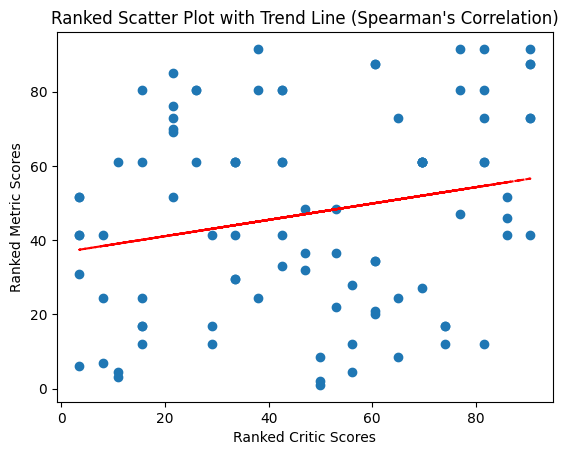

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Ranked data
ranked_critic_scores = critic_scores.rank()
ranked_metric_scores = metric_scores.rank()

# Create scatter plot
plt.scatter(ranked_critic_scores, ranked_metric_scores)

# Add a trend line (fitting a linear regression model)
z = np.polyfit(ranked_critic_scores, ranked_metric_scores, 1)
p = np.poly1d(z)
plt.plot(ranked_critic_scores, p(ranked_critic_scores), "r--")

# Labels and title
plt.title("Ranked Scatter Plot with Trend Line (Spearman's Correlation)")
plt.xlabel("Ranked Critic Scores")
plt.ylabel("Ranked Metric Scores")

plt.show()


In [68]:
import numpy as np
from statsmodels.stats.power import NormalIndPower, zt_ind_solve_power

# Parameters for the power analysis
effect_size = abs(pearson_corr)  # Use the absolute value of the Pearson correlation as the effect size
alpha = 0.05  # Significance level
power = 0.8   # Desired power level (usually 0.8)
alternative = 'two-sided'  # We are testing both positive and negative correlations

# Conduct power analysis to find the minimum sample size
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative=alternative)

print(f"Minimum sample size required: {sample_size:.0f}")

# Check if current sample size is adequate
current_sample_size = len(critic_scores)
print(f"Current sample size: {current_sample_size}")

if current_sample_size >= sample_size:
    print("The current sample size is sufficient.")
else:
    print("The current sample size is insufficient.")


Minimum sample size required: 1097
Current sample size: 93
The current sample size is insufficient.


In [69]:
import numpy as np
from scipy.stats import pearsonr

# Function to compute Pearson correlation for bootstrapped samples
def bootstrap_pearson(data1, data2, n_bootstraps=1000):
    bootstrap_correlations = []
    n = len(data1)
    for _ in range(n_bootstraps):
        indices = np.random.choice(range(n), n, replace=True)
        sample_corr, _ = pearsonr(data1[indices], data2[indices])
        bootstrap_correlations.append(sample_corr)
    return np.percentile(bootstrap_correlations, [2.5, 97.5])

# Run bootstrapping on the existing data
ci_lower, ci_upper = bootstrap_pearson(np.array(critic_scores), np.array(metric_scores))

print(f"95% Confidence Interval for Pearson's correlation: [{ci_lower:.3f}, {ci_upper:.3f}]")


95% Confidence Interval for Pearson's correlation: [-0.070, 0.291]


In [70]:
import numpy as np
from statsmodels.stats.power import NormalIndPower, zt_ind_solve_power

# Parameters for the power analysis
effect_size = abs(spearman_corr)  # Use the absolute value of the Spearman correlation as the effect size
alpha = 0.05  # Significance level
power = 0.8   # Desired power level (usually 0.8)
alternative = 'two-sided'  # We are testing both positive and negative correlations

# Conduct power analysis to find the minimum sample size
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative=alternative)

print(f"Minimum sample size required: {sample_size:.0f}")

# Check if current sample size is adequate
current_sample_size = len(critic_scores)
print(f"Current sample size: {current_sample_size}")

if current_sample_size >= sample_size:
    print("The current sample size is sufficient.")
else:
    print("The current sample size is insufficient.")


Minimum sample size required: 323
Current sample size: 93
The current sample size is insufficient.


In [71]:
import numpy as np

# Function to compute Spearman correlation for bootstrapped samples
def bootstrap_spearman(data1, data2, n_bootstraps=1000):
    bootstrap_correlations = []
    n = len(data1)
    for _ in range(n_bootstraps):
        indices = np.random.choice(range(n), n, replace=True)
        sample_corr, _ = spearmanr(data1[indices], data2[indices])
        bootstrap_correlations.append(sample_corr)
    return np.percentile(bootstrap_correlations, [2.5, 97.5])

# Run bootstrapping on the existing data
ci_lower, ci_upper = bootstrap_spearman(np.array(critic_scores), np.array(metric_scores))

print(f"95% Confidence Interval for Spearman correlation: [{ci_lower:.3f}, {ci_upper:.3f}]")


95% Confidence Interval for Spearman correlation: [0.026, 0.420]


In [72]:
from statsmodels.stats.power import NormalIndPower

# Parameters for the power analysis using Kendall's Tau correlation coefficient
effect_size = abs(kendall_corr)  # Use the absolute value of the Kendall correlation as the effect size
alpha = 0.05  # Significance level
power = 0.8   # Desired power level (usually 0.8)
alternative = 'two-sided'  # Testing for both positive and negative correlations

# Conduct power analysis to find the minimum sample size
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative=alternative)

print(f"Minimum sample size required for Kendall's Tau: {sample_size:.0f}")

# Check if current sample size is adequate
current_sample_size = len(critic_scores)
print(f"Current sample size: {current_sample_size}")

if current_sample_size >= sample_size:
    print("The current sample size is sufficient for Kendall's Tau.")
else:
    print("The current sample size is insufficient for Kendall's Tau.")


Minimum sample size required for Kendall's Tau: 724
Current sample size: 93
The current sample size is insufficient for Kendall's Tau.


In [73]:
def bootstrap_kendall(data1, data2, n_bootstraps=1000):
    bootstrap_correlations = []
    n = len(data1)
    for _ in range(n_bootstraps):
        indices = np.random.choice(range(n), n, replace=True)
        sample_corr, _ = kendalltau(data1[indices], data2[indices])
        bootstrap_correlations.append(sample_corr)
    return np.percentile(bootstrap_correlations, [2.5, 97.5])

# Run bootstrapping on the existing data
ci_lower, ci_upper = bootstrap_kendall(np.array(critic_scores), np.array(metric_scores))

print(f"95% Confidence Interval for Kendall's Tau correlation: [{ci_lower:.3f}, {ci_upper:.3f}]")


95% Confidence Interval for Kendall's Tau correlation: [0.010, 0.292]
